# Mini projecto: MLP - multiclass

In [1]:
# == Q1 == 
# Considera un problema de clasificación binaria, en donde queremos separar
# imágenes de los dígitos 5 y 9. ¿Qué etiquetas usarías y en qué formato?

Usariamos etiquetas binarias. Sin perdida de generalidad podriamos asignar 0 a lo 5 y 1 a los 9 para hacer mas sencilla la clasificación.

In [2]:
# == Q2 ==
# ¿Por qué es conveniente usar la activación sigmoide en la capa de salida de
# una red neuronal para clasificación binaria?

La forma de la funcion sigmoide es la siguiente:

$\sigma(z) \equiv \frac{1}{1 + e^{-z}}$

Con $z = \vec{w}*\vec{x} + b$ siendo $w$ los pesos, $x$ el input de la neurona y $b$ el bias.

La motivacion de usar esta funcion pueden ser varias. 

- Al usar esta funcion podemos mapear funciones de $\mathbb{R} \rightarrow [0,1]$, y asignar de esta forma una probabilidad a un input de pertenecer o no pertencer a cierta clase.
- Usar esta funcion en la capa final nos daria un $\hat{y} \in [0,1]$, con el cual podriamos hacer clasificación binaria. 
- Cuando se utiliza esta funcion, al hacer backpropagation tiene un buen comportamiento a difrencia de un perceptron normal. En otras palabras los cambios son mas suaves sobre los pesos de la red (tambien para los bias).
-Adicionalmente es conveniente usar la activacion sigmoide en  las capas interiores para resolver problemas no lineales. 

In [3]:
# == Q3 ==
# Investiga qué forma tiene la función softmax, y explica por qué es conveniente
# en la activación de salida de una red neuronal para clasificación multi clase.

La forma de la función softmax es la siguiente: 

$\sigma(\vec{z}) \equiv \frac{e^{z_{i}}}{\sum_{j = 1}^{K}e^{z_{j}}}$

Las ventajas de usar esta función, sigue un poco la misma logica que la funcion _sigmoide_, pero para hacer clasificaciones de mas de una clase.
Esta funcion recibe valores de $\mathbb{R}^n \rightarrow \mathbb{R}^n$. 
Al usar este vector en la capa final obtenemos una clasificación, en donde el resultado de $\sigma(\vec{z}) = \hat{y}$ es un vector, en donde las entradas $y_i$ contienen la probabilidad de que el input $\vec{x}$ pertenezca a la i-esima clase. 
En donde se cumple que
* $\hat{y}_i \in [0,1]$ 
* $\sum_{i=1}^{n} \hat{y}_i = 1$

In [4]:
# == Q4 ==
# Investiga qué forma tiene la función ReLU, y explica en qué tipo de capas de
# redes neuronales se usa comunmente.

La forma de la función ReLu es la siguiente: 

$f(x) = \text{max}\{0,x\}$

En la practica es común usar este tipo de funciones en las capas interiores de las redes neuronales. Se usa sobre todo en redes neuronales con muchas capas,ya que al usar la función sigmoide cuando el gradiente del error es muy pequeño, muhcas veces no se corrigen las primeras capas de la neurona pues llega muy diluido el cambio al hacer back propagation. Es por eso que es conveniente sustituir por funciones ReLu.



In [5]:
# == Q5 ==
# Usa entre 1 y 5 capas (tú decide el número de nodos por capa), y trata de
# maximizar el desempeño de clasificación para el problema de 10 classes.
# En una tabla, reporta los hiperparámetros de tus 5 mejores modelos y su
# desempeño de clasificación.

In [6]:
# Imports
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model

In [7]:
# Set Seed
random.seed(2020)

# Load data
(x_train, y_train), (x_test, y_test_normal) = mnist.load_data()

# Put images into nice format for keras
x_train = np.reshape(x_train, (len(x_train), -1)) / 255.
x_test  = np.reshape(x_test, (len(x_test), -1)) / 255.

# Put labels in one-hot encoding format
y_train = tf.one_hot(y_train, depth=10)
y_test  = tf.one_hot(y_test_normal, depth=10)

# Set batch size & number of epochs
nb = 25 #25
ne = 50 #50

# Create vec to compare n_layers
n_layers_train = []
n_layers_test = []

In [8]:
# Create model 1
mlp = Sequential(name='MLP')
mlp.add(Input(shape=(784,)))
mlp.add(Dense(units=10,  activation='softmax'))

# Compile
mlp.compile(optimizer='sgd', loss='mse', metrics=['acc'])

# Training
history = mlp.fit(x=x_train, y=y_train, batch_size=nb, epochs=ne, verbose=0,validation_data=(x_test, y_test))

n_layers_train.append(history.history['acc'][-1]) # Accuracy entrenamiento
n_layers_test.append(history.history['val_acc'][-1]) # Accuracy validación

In [9]:
# Create model 2
mlp = Sequential(name='MLP')
mlp.add(Input(shape=(784,)))
mlp.add(Dense(units=397, activation='relu'))
mlp.add(Dense(units=10,  activation='softmax'))

# Compile
mlp.compile(optimizer='sgd', loss='mse', metrics=['acc'])

# Training
history = mlp.fit(x=x_train, y=y_train, batch_size=nb, epochs=ne, verbose=0,validation_data=(x_test, y_test))

n_layers_train.append(history.history['acc'][-1]) # Accuracy entrenamiento
n_layers_test.append(history.history['val_acc'][-1]) # Accuracy validación

In [10]:
# Create model 3
mlp = Sequential(name='MLP')
mlp.add(Input(shape=(784,)))
mlp.add(Dense(units=512, activation='relu'))
mlp.add(Dense(units=128, activation='relu'))
mlp.add(Dense(units=10,  activation='softmax'))

# Compile
mlp.compile(optimizer='sgd', loss='mse', metrics=['acc'])

# Training
history = mlp.fit(x=x_train, y=y_train, batch_size=nb, epochs=ne, verbose=0,validation_data=(x_test, y_test))

n_layers_train.append(history.history['acc'][-1]) # Accuracy entrenamiento
n_layers_test.append(history.history['val_acc'][-1]) # Accuracy validación

In [11]:
# Create model 4
mlp = Sequential(name='MLP')
mlp.add(Input(shape=(784,)))
mlp.add(Dense(units=590, activation='relu'))
mlp.add(Dense(units=397, activation='relu'))
mlp.add(Dense(units=203, activation='relu'))
mlp.add(Dense(units=10,  activation='softmax'))

# Compile
mlp.compile(optimizer='sgd', loss='mse', metrics=['acc'])

# Training
history = mlp.fit(x=x_train, y=y_train, batch_size=nb, epochs=ne, verbose=0,validation_data=(x_test, y_test))

n_layers_train.append(history.history['acc'][-1]) # Accuracy entrenamiento
n_layers_test.append(history.history['val_acc'][-1]) # Accuracy validación  

In [12]:
# Create model 5
mlp = Sequential(name='MLP')
mlp.add(Input(shape=(784,)))
mlp.add(Dense(units=629, activation='relu'))
mlp.add(Dense(units=474, activation='relu'))
mlp.add(Dense(units=319, activation='relu'))
mlp.add(Dense(units=164, activation='relu'))
mlp.add(Dense(units=10,  activation='softmax'))

# Compile
mlp.compile(optimizer='sgd', loss='mse', metrics=['acc'])

# Training
history = mlp.fit(x=x_train, y=y_train, batch_size=nb, epochs=ne, verbose=0,validation_data=(x_test, y_test))

n_layers_train.append(history.history['acc'][-1]) # Accuracy entrenamiento
n_layers_test.append(history.history['val_acc'][-1]) # Accuracy validación

In [13]:
# Create model Pilon
mlp = Sequential(name='MLP')
mlp.add(Input(shape=(784,)))
mlp.add(Dense(units=629, activation='relu'))
mlp.add(Dense(units=474, activation='elu'))
mlp.add(Dense(units=319, activation='elu'))
mlp.add(Dense(units=164, activation='elu'))
mlp.add(Dense(units=10,  activation='softmax'))

# Compile
mlp.compile(optimizer='sgd', loss='mse', metrics=['acc'])

# Training
history = mlp.fit(x=x_train, y=y_train, batch_size=nb, epochs=ne, verbose=0,validation_data=(x_test, y_test))

a =history.history['acc'][-1] # Accuracy entrenamiento
b = history.history['val_acc'][-1] # Accuracy validación

print('Accuracy entrenamiento: {}'.format(a))
print('Accuracy validación: {}'.format(b))

Accuracy entrenamiento: 0.9688666462898254
Accuracy validación: 0.9628999829292297


In [35]:
N = [1,2,3,4,5]
data = {'Layers':N,
        'Train': n_layers_train,
        'Validation': n_layers_test
        }

tabla = pd.DataFrame(data, columns = ['Layers','Train', 'Validation'])
#tabla.set_index('Layers',inplace=True)
#tabla
print(tabla.to_string(index=False))

 Layers     Train  Validation
      1  0.899450      0.9067
      2  0.932250      0.9329
      3  0.947267      0.9459
      4  0.959150      0.9522
      5  0.966050      0.9594


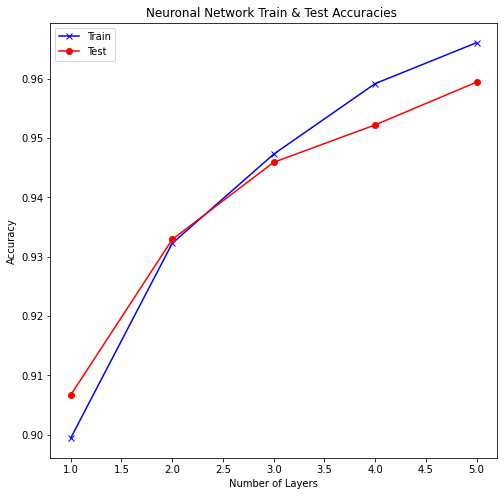

In [14]:
# N_layers Plot
plt.figure(figsize=(8,8))
plt.plot(N, n_layers_train, 'bx-',label = 'Train')
plt.plot(N, n_layers_test, 'ro-',label = 'Test')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.title('Neuronal Network Train & Test Accuracies ')
plt.legend()
plt.show()

Podemos ver una tendencia positiva. Confomre aumentamos las capas de la neurona obtenemos mejores resultados de presición.

In [15]:
# == Q6 ==
# Para el mejor modelo obtenido, reporta sus curvas de desempeño respecto a las
# epocas de entrenamiento. También reporta la matriz de confusión para el set de
# test.

Nuestro mejor modelo fue aumentando el numero de capas de la red neuronal, y usando la funcion de activacion _elu_, la cual es una implementacion de la funcion _relu_. Con la cual se evita el problema de dejar neuronas "muertas" en el proceso de black-propagation.
Obteniendo al final un resultado de $.968$ en entrentamiento y $0.962$ de presición en validacion.La cual es considerablemente mayor a las obtenidas con _relu_

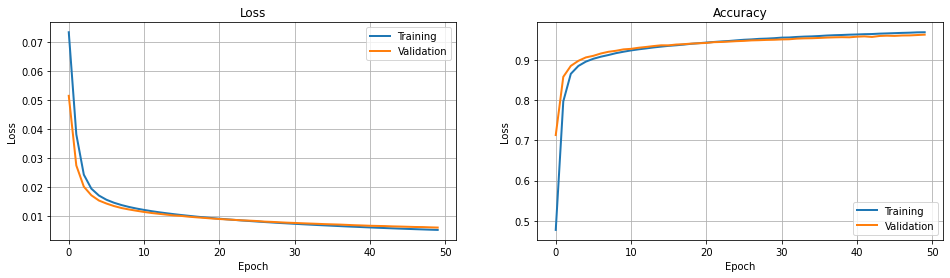

In [16]:
# Plot loss and accuracy
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='Training', linewidth=2)
plt.plot(history.history['val_acc'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


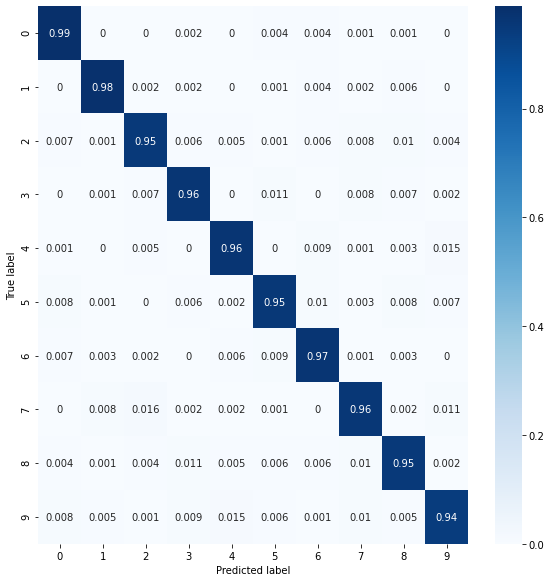

In [17]:
# Confusion Matrix
classes=[0,1,2,3,4,5,6,7,8,9]
y_pred = mlp.predict_classes(x_test)

con_mat = tf.math.confusion_matrix(labels = y_test_normal, predictions = y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=3)
con_mat_df = pd.DataFrame(con_mat_norm,index = classes,columns = classes)

# Ploteamos la Matriz
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.show()

In [18]:
# == Q7 ==
# Usando tu mejor modelo, ¿Notas algún cambio en el desempeño si usas
# 'categorical_crossentropy' como pérdida, en vez de 'mse'?
# Si sí, ¿cuál es el cambio?

In [ ]:
# Compile
mlp.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

# Training
history = mlp.fit(x=x_train, y=y_train, batch_size=nb, epochs=ne, verbose=0,validation_data=(x_test, y_test))

a = history.history['acc'][-1] # Accuracy entrenamiento
b = history.history['val_acc'][-1] # Accuracy validación

print('Accuracy entrenamiento: {}'.format(a))
print('Accuracy validación: {}'.format(b))

Accuracy entrenamiento: 1.0
Accuracy validación: 0.9805999994277954


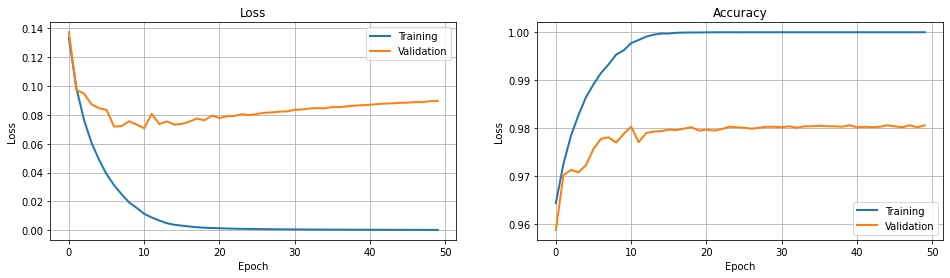

In [20]:
# Plot loss and accuracy
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='Training', linewidth=2)
plt.plot(history.history['val_acc'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

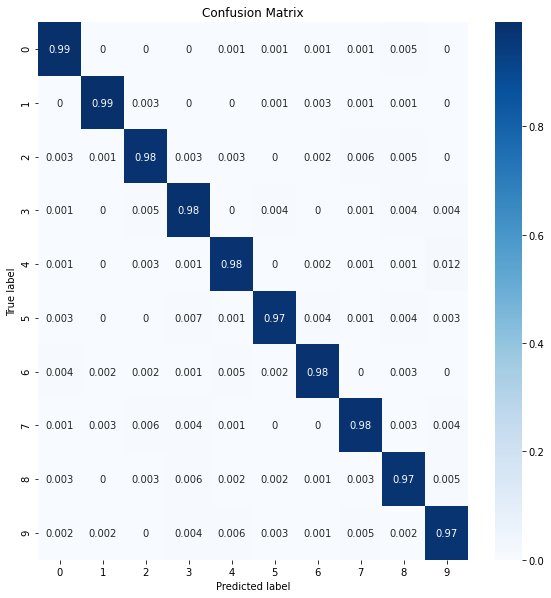

In [22]:
# Confusion Matrix
classes=[0,1,2,3,4,5,6,7,8,9]
y_pred = mlp.predict_classes(x_test)

con_mat = tf.math.confusion_matrix(labels = y_test_normal, predictions = y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=3)
con_mat_df = pd.DataFrame(con_mat_norm,index = classes,columns = classes)

# Ploteamos la Matriz
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

Al usar la función de perdida _crossentropy_ podemos observar que hay un considerable cambio positivo en nuestro mejor modelo obtenido. Esto lo aseguramos pues se obtuvieron $1$ presicioó en entrentamiento y $0.98$ de presición en validacion.

Esto se debe a que pasamos de usar el _mean squared error_ a la función _crossentropy_ dada por la siguiente ecuación.

$C =− \frac{1}{n}\sum_{x}[y \: ln(a) +(1−y)\:ln(1−a)]$

Donde:
  * $z=\sum_{j} w_{j} x_{j}+b$
  * $a = \sigma(z)$
  * n es el numero total de items en el set de entrenamiento.
  * la suma es sobre todos los inputs de $x$
  * $y$ es la clasificación deseada.

  Esta función es mejor, pues tiene el beneficio, a diferencia del error cuadratico medio, de evitar una lenta tasa de aprendizaje.